+ This notebook is part of the addition lecture *An overview of key ideas* in the OCW MIT course 18.06 by Prof Gilbert Strang [1]
+ Created by me, Dr Juan H Klopper
    + Specialist Surgeon
    + Groote Schuur Hospital
    + Senior Lecturer in Surgery and Biostatistics & Machine Learning
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a> 
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Linear Algebra OCW MIT18.06</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">IPython notebook [2] study notes by Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] <a href="http://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm">OCW MIT 18.06</a>
+ [2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

![SegmentLocal](KRG_elegant_logo_for_light_BG.png "segment")
![SegmentLocal](UCT_logo.gif "segment")

### Library import

In [2]:
from sympy import init_printing, Matrix, symbols, eye, Rational
init_printing()

# Elimination

## A system of linear equations

In the previous lesson, we had a brief glimpse at linear systems.  The _linear_ in _linear systems_ refers to the fact that each variable appears on its own (i.e. to the power $1$ and not in the form $x \times y$ or the like) and it is not transcendental.  If a solution exists, it then satisfies all of the equations at once.  We will consider the linear system in (1).

$$ \begin{align} 1x+2y+1z &= 2 \\ 3x + 8y + 1z &= 12 \\ 0x + 4y + 1z &= 2 \end{align} \tag{1} $$

A possible solution for $x,y$, and $z$ is given in (2), where $x=2$, $y=1$, and $z = -2$.

$$ \begin{align} 1\left(2\right)+2\left(1\right)+1\left(-2\right) &= 2 \\ 3\left(2\right)+8\left(1\right)+1\left(-2\right) &= 12 \\ 0\left(2\right)+4\left(1\right)+1\left(-2\right) &= 2 \end{align} \tag{2} $$

Since (1) is a set (three) equations that have a solution ( or possibly solutions) for their variables in common, all left- and all right hand sides can be manipulated in certain ways.

We could simply exchange the order of the equations.  In (3) the second and third equations have been exchanged, called _row exchange_.

$$ \begin{align}1x+2y+1z &= 2 \\ 0x + 4y + 1z &= 2 \\ 3x + 8y + 1z &= 12 \end{align} \tag{3} $$

We could multiply both the left- and right-hand side of one of the equations with a scalar.  In (4) we multiply the first equation by $2$.

$$ \begin{align} 2x+4y+2z &= 4 \\ 3x + 8y + 1z &= 12 \\ 0x + 4y + 1z &= 2 \end{align} \tag{4}$$

Lastly, we can subtract a constant multiple of one equation from another.

These three _manipulations_ serve an excellent purpose, as it allows us to eliminate of one (or more) of the variables (that is, give it a coefficient of $0$).  Remember that we are trying to solve for all three equations and have three unknowns.  We can most definitely struggle by doing this problem algebraically by substitution, but linear algebra makes it much easier.

In (5) we have multiplied the first equation by $3$ (both sides, so that we maintain integrity of the equation) and subtracted the left hand side of this new equation from the left-hand side of the second equation and the new right-hand side of the first equation from the right-hand side of the second equation.  This is quite legitimate, as the left- and right-hand sides are equal (it is an equation after all) and so, when subtracting from the second equation, we are still doing the same thing to the left-hand side as the right-hand side.

$$ \begin{align} 1x+2y+1z &= 2 \\ 0x + 2y - 2z &= 6 \\ 0x + 4y + 1z &= 2 \end{align} \tag{5} $$

This has introduced a nice $0$ in the second equation.  Let's go further and multiply the second equation by $2$ and subtract that from the third equation as seen in (6) below.

$$ \begin{align} 1x+2y+1z &= 2 \\ 0x + 2y - 2z &= 6 \\ 0x + 0y + 5z &= -10 \end{align} \tag{6} $$

Now let last equation is easy to solve for $z$.

$$ z=-2 \tag{7}$$

Knowing this, we can go back up to the second equation and solve for $y$.

$$ \begin{align} 2y+2(-2) &= 6 \\ y &= 1 \end{align} \tag{8} $$

Finally, up to the first equation.

$$ \begin{align} x+2(1)+1(-2) &= 2 \\ x &= 2 \end{align} \tag{9} $$

We have solved the linear system by substitution.  We need to have gone straight for substitution, though.  Indeed, we could have tried to get zeros above all our leading (non-zero) coefficients.  Let's just clean up the third equation by multiplying throughout by $\frac{1}{5}$ as in (10) below.

$$ \begin{align} 1x+2y+1z &= 2 \\ 0x + 2y - 2z &= 6 \\ 0x + 0y + 1z &= -2 \end{align} \tag{10} $$

Now we have to get rid of the $-2z$ in the second equation, which we can do by multiplying the third equation by $-2$ and subtracting from the second equation.

$$ \begin{align}  1x+2y+1z &= 2 \\ 0x + 2y - 0z &= 2 \\ 0x + 0y + 1z &= -2 \end{align} \tag{11}$$

Multiplying the second equation by $\frac{1}{2}$ yields (12).

$$ \begin{align}1x+2y+1z &= 2 \\ 0x + 1y + 0z &= 1 \\ 0x + 0y + 1z &= -2 \end{align} \tag{12} $$

Now we can do the same to get rid of the $1z$ in the first equation (multiply the third equation by $1$ and subtract it from the first equation.

$$ \begin{align} 1x+2y+0z &= 4 \\ 0x + 1y + 0z &= 1 \\ 0x + 0y + 1z &= -2 \end{align} \tag{12}$$

Now tow get rid of the $2y$ in the first equation, which is above our leading $1y$ in the second equation.  Simple enough, we multiply he second equation by $2$ and subtract that from the first equation.

$$ \begin{align} 1x+0y+0z &= 2 \\ 0x + 1y + 0z &= 1 \\ 0x + 0y + 1z &= -2 \end{align} \tag{13} $$

The solution is now clear for $x,y$, and $z$.

We need not rewrite all of the variables all the time.  We can simply write the coefficients.  The augmented matrix of coefficients is in (14).

$$ \begin{bmatrix} 1&2&1&2\\3&8&1&12\\0&4&1&2 \end{bmatrix} \tag{14} $$

A matrix has rows and columns (attached, in position, to our algebraic equation above).  We simply omit the variables.  The left-upper entry is called the pivot.  Our aim is to get everything below it to be a zero (as we did with the algebra).  We do exactly the same as we did above, which is multiply row 1 by 3 and subtract these new values from row 2.

$$ \begin{bmatrix} 1&2&1&2\\0&2&-2&6\\0&4&1&2 \end{bmatrix} \tag{15} $$

Now $2$ times row 2 subtracted from row 3.

$$ \begin{bmatrix} 1&2&1&2\\0&2&-2&6\\0&0&5&-10 \end{bmatrix} \tag{16} $$

Multiply the last row with $\frac{1}{5}$.

$$ \begin{bmatrix} 1&2&1&2\\0&2&-2&6\\0&0&1&-2 \end{bmatrix} \tag{17} $$

This shows $z = -2$ in the last row of (17).  

With this small matrix, it's easy to do back substitution as we did algebraically.  The first non-zero number in each row is the pivot (just like the upper-left entry).  The steps we have taken up to this point is called _Gauss elimination_ and the form we end up with is _row-echelon form_.  We could carry on and do the same sort of thing to get rid of all the non-zero entries above each pivot.  This is called _Gauss-Jordan elimination_ and the result is _reduced row-echelon form_ (see the computer code below).

All of these steps are called _elementary row operations_.  The only one we didn't do is _row exchange_.  We reserve this action so as not to have leading (in the pivot position) zeros.

Let's create some code to show-case elementary row operations.

In [10]:
A_augmented = Matrix([[1, 2, 1, 2], [3, 8, 1, 12], [0, 4, 1, 2]])
A_augmented

⎡1  2  1  2 ⎤
⎢           ⎥
⎢3  8  1  12⎥
⎢           ⎥
⎣0  4  1  2 ⎦

We can ask `sympy` to simply get the augmented matrix in reduced row-echelon form and read off the solutions.  This is done with the `.rref()` method.

In [11]:
A_augmented.rref() # The rref() method returns the reduced row-echelon form

⎛⎡1  0  0  2 ⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  1 ⎥, (0, 1, 2)⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  1  -2⎦           ⎠

## Elimination matrices

Matrices can only be multiplied by each other if in order we have the first column size equal the second row size.  Rows are usually called $m$ and columns $n$ when considering their dimensions.  So, our augmented matrix above will be $m \times n = 3 \times 4$.

Let's look at how matrices are multiplied by looking at two small matrices in (18).

$$ \begin{bmatrix} {a}_{11}&{a}_{12} \\ {a}_{21}&{a}_{22} \end{bmatrix} \\ \\ \begin{bmatrix} {b}_{11}&{b}_{12}\\{b}_{21}&{b}_{22} \end{bmatrix} \tag{18} $$

The subscripts refer to row and column position, i.e. $21$ means row $2$ column $1$>

We see that we have a two $ 2 \times 2 $ matrices.  The *inner* two values are the same ($2$ and $2$), so this multiplication is allowed.  The resultant matrix will have the size equal to the *outer* two values (first row and last columns); here also a $2 \times 2$ matrix.

So let's look at position $11$ (row $1$ and column $1$).  To get this we take the entries in row $1$ of the first matrix and multiply them by the entries in the first column of the second matrix.  We do this element by element and add the multiplication of each set of separate elements to each other.  The python code below shows you exactly how this is done.

In [12]:
a11, a12, a21, a22, b11, b12, b21, b22 = symbols('a11 a12 a21 a22 b11 b12 b21 b22')

In [13]:
A = Matrix([[a11, a12], [a21, a22]])
B = Matrix([[b11, b12], [b21, b22]])
A, B

⎛⎡a₁₁  a₁₂⎤  ⎡b₁₁  b₁₂⎤⎞
⎜⎢        ⎥, ⎢        ⎥⎟
⎝⎣a₂₁  a₂₂⎦  ⎣b₂₁  b₂₂⎦⎠

In [14]:
A * B

⎡a₁₁⋅b₁₁ + a₁₂⋅b₂₁  a₁₁⋅b₁₂ + a₁₂⋅b₂₂⎤
⎢                                    ⎥
⎣a₂₁⋅b₁₁ + a₂₂⋅b₂₁  a₂₁⋅b₁₂ + a₂₂⋅b₂₂⎦

Let's constrain ourselves to the matrix of coefficients (this discards the right-hand side from the augmented matrix above).

In [15]:
A = Matrix([[1, 2, 1], [3, 8, 1], [0, 4, 1]]) # I use the same computer variable above, which
# will change its value in the computer memory
A # A 3 by 3 matrix, which we call square

⎡1  2  1⎤
⎢       ⎥
⎢3  8  1⎥
⎢       ⎥
⎣0  4  1⎦

The _identity matrix_ is akin to the number $1$, i.e. multiplying by it leaves everything unchanged.  It has ones along what is called the main diagonal and zeros everywhere else.

In [16]:
I = eye(3) # Identity matrices are always square and the argument
# here is 3, so it is a 3 by 3 matrix
I # Note what the main diagonal is

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Let's multiply $I$ by $A$.

In [17]:
I * A # Nothing will change

⎡1  2  1⎤
⎢       ⎥
⎢3  8  1⎥
⎢       ⎥
⎣0  4  1⎦

To get rid of the leading $3$ in the second row(because we want a $0$ under the first pivot in the first row), we multiply the first row by $3$ and subtract that from the second row.  Interestingly enough, we can do the same to the identity matrix.

In [18]:
E21 = Matrix([[1, 0, 0], [-3, 1, 0], [0, 0, 1]])
E21 # 21 because we are working on row 2, column 1

⎡1   0  0⎤
⎢        ⎥
⎢-3  1  0⎥
⎢        ⎥
⎣0   0  1⎦

That gives us the required 3 times the first row and the negative shows that we subtract (add the negative).  It's a thing of beauty!

In [20]:
E21 * A

⎡1  2  1 ⎤
⎢        ⎥
⎢0  2  -2⎥
⎢        ⎥
⎣0  4  1 ⎦

Just what we wanted.  $E1$ is called the first elimination matrix.

Let's do something to the identity matrix to get rid of the $4$ in the third row (the second column).  It would require $2$ times the second row subtracted from the third row.  Look carefully at the positions.

In [21]:
E32 = Matrix([[1, 0, 0], [0, 1, 0], [0, -2, 1]])
E32

⎡1  0   0⎤
⎢        ⎥
⎢0  1   0⎥
⎢        ⎥
⎣0  -2  1⎦

In [22]:
E32 * (E21 * A)

⎡1  2  1 ⎤
⎢        ⎥
⎢0  2  -2⎥
⎢        ⎥
⎣0  0  5 ⎦

Spot on!  We now have nice pivots (leading non-zeros), with nothing under them (along the columns).  As a tip, try not to get fractions involved.  As far as the other two row operations are concerned, we can either exchange rows in the identity matrix or multiply the required row by a scalar constant.

Look at what happens when we multiply $E2$ and $E1$.

In [23]:
L_inv = E32 * E21
L_inv

⎡1   0   0⎤
⎢         ⎥
⎢-3  1   0⎥
⎢         ⎥
⎣6   -2  1⎦

Later we'll call this matrix the inverse of $L$.  It is in triangular form, in this case lower triangular (note all the zeros above the main diagonal).

In [24]:
L_inv * A # Later we'll call this result the matrix U

⎡1  2  1 ⎤
⎢        ⎥
⎢0  2  -2⎥
⎢        ⎥
⎣0  0  5 ⎦

We now have the following, shown in (19).

$$ {L}^{-1}{A}={U} \tag{19} $$

Left-multiplying by $L$ leaves (20).

$$ {L}{L}^{-1}{A}={L}{U} \tag{20} $$

The inverse of a square matrix multiplied by itself gives the identity matrix.

$$ {I}{A}={L}{U} \\ {A}={L}{U} \tag{20} $$

We can construct $L$ from $E32$ and $E21$ above.

$$ {E}_{21}^{-1}{E}_{32}^{-1}{E}_{32}{E}_{21}={E}_{21}^{-1}{E}_{32}^{-1}{U} \\ \therefore {E}_{21}^{-1}{E}_{32}^{-1}={L} \tag{21} $$

In [25]:
E21.inv() # The inverse is easy to understand in words
# We just want to add 3 instead of subtracting 3

⎡1  0  0⎤
⎢       ⎥
⎢3  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [26]:
E32.inv()

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  2  1⎦

In [27]:
E21.inv() * E32.inv()

⎡1  0  0⎤
⎢       ⎥
⎢3  1  0⎥
⎢       ⎥
⎣0  2  1⎦

This is exactly the inverse of our inverse of $L$ above.

In [28]:
L_inv.inv()

⎡1  0  0⎤
⎢       ⎥
⎢3  1  0⎥
⎢       ⎥
⎣0  2  1⎦

This is called _LU-decomposition_ of $A$.  More about this in two chapters from now (I_05_LU_decomposition).

As an aside we can also do elementary column operation, but then we have to multiply on the right of $A$ and not on the left as above.

## Example problems

### Example problem 1

Solve the linear system in (22).

$$ \begin{align} x-y-z+u &= 0 \\ 2x+2z &= 8 \\ -y-2z &= -8 \\ 3x-3y-2z+4u &= 7 \end{align} \tag{22} $$

#### Solution

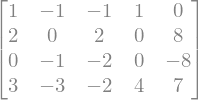

In [20]:
A_augm = Matrix([[1, -1, -1, 1, 0], [2, 0, 2, 0, 8], [0, -1, -2, 0, -8], [3, -3, -2, 4, 7]])
A_augm

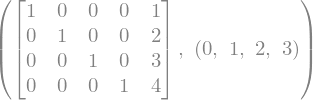

In [21]:
A_augm.rref()

Whoa! That was easy!  Let's take it a notch down and create some elementary matrices.  First off, we want the matrix of coefficients.

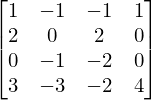

In [25]:
A = Matrix([[1, -1, -1, 1], [2, 0, 2, 0], [0, -1, -2, 0], [3, -3, -2, 4]])
A

Now we need to get rid of the $2$ in position row `2`, column `1`.  We start by numbering the elementary matrix by this position and modifying the identity matrix.

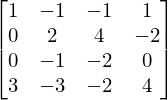

In [26]:
E21 = Matrix([[1, 0, 0, 0], [-2, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
E21 * A

Now for position row `3`, column `2`.  We have to use row `2` to do this.  If we used row `1`, we would introduce a non-zero into position row `3`, column `1`.

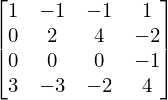

In [27]:
E32 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, Rational(1, 2), 1, 0], [0, 0, 0, 1]])
E32 * (E21 * A)

Now for the $3$ in position row `4`, column `1`.

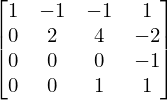

In [28]:
E41 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [-3, 0, 0, 1]])
E41 * (E32 * E21 * A)

Let's exchange rows `3` and `4`.

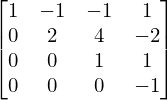

In [29]:
Ee34 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
Ee34 * E41 * E32 * E21 * A

Let's see where that leaves $\mathbf{b}$.  After all, what we do to the left, we must do to the right.

$$ {Ee}_{34}\times{E}_{41}\times{E}_{32}\times{E}_{21}{A}{x}={Ee}_{34}\times{E}_{41}\times{E}_{32}\times{E}_{21}{b} \tag{23}$$

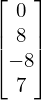

In [30]:
b_vect = Matrix([[0], [8], [-8], [7]])
b_vect

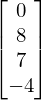

In [31]:
Ee34 * E41 * E32 * E21 * b_vect

Let's print them next to each other on the screen.

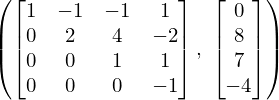

In [32]:
Ee34 * E41 * E32 * E21 * A, Ee34 * E41 * E32 * E21 * b_vect

So we can simply do back substitution.  We note that $-1u = -4$ and thus $u = 4$.  From here, we work our way back up.

$$ \begin{align} -1(u) = -4 \quad &\therefore \quad u=4 \\ 1(z)+1(4) = 7 \quad &\therefore \quad z=3 \\  2(y) + 4(3) - 2(4) = 8 \quad &\therefore \quad y=2 \\ 1(x)-1(2)-1(3)+1(4)=0 \quad &\therefore \quad x=1 \end{align} \tag{24}$$

## Solution

In [32]:
A_aug = Matrix([[1, -1, -1, 1, 0], [2, 0, 2, 0, 8], [0, -1, -2, 0, -8], [3, -3, -2, 4, 7]])
A_aug

⎡1  -1  -1  1  0 ⎤
⎢                ⎥
⎢2  0   2   0  8 ⎥
⎢                ⎥
⎢0  -1  -2  0  -8⎥
⎢                ⎥
⎣3  -3  -2  4  7 ⎦

In [33]:
A_aug.rref()

⎛⎡1  0  0  0  1⎤              ⎞
⎜⎢             ⎥              ⎟
⎜⎢0  1  0  0  2⎥              ⎟
⎜⎢             ⎥, (0, 1, 2, 3)⎟
⎜⎢0  0  1  0  3⎥              ⎟
⎜⎢             ⎥              ⎟
⎝⎣0  0  0  1  4⎦              ⎠

Solution is $(1,2,3,4)$

In [34]:
E21 = Matrix([[1,0,0,0], [-2,1,0,0], [0,0,1,0], [0,0,0,1]])
E21

⎡1   0  0  0⎤
⎢           ⎥
⎢-2  1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

In [35]:
E21 * A_aug

⎡1  -1  -1  1   0 ⎤
⎢                 ⎥
⎢0  2   4   -2  8 ⎥
⎢                 ⎥
⎢0  -1  -2  0   -8⎥
⎢                 ⎥
⎣3  -3  -2  4   7 ⎦

In [36]:
E32 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 1/2, 1, 0], [0, 0, 0, 1]])
E32 * E21 * A_aug

⎡1  -1  -1   1     0  ⎤
⎢                     ⎥
⎢0  2   4    -2    8  ⎥
⎢                     ⎥
⎢0  0   0   -1.0  -4.0⎥
⎢                     ⎥
⎣3  -3  -2   4     7  ⎦

In [38]:
P43 = Matrix([[1,0,0,0], [0,1,0,0], [0,0,0,1], [0,0,1,0]])
P43 * E32 * E21 * A_aug

⎡1  -1  -1   1     0  ⎤
⎢                     ⎥
⎢0  2   4    -2    8  ⎥
⎢                     ⎥
⎢3  -3  -2   4     7  ⎥
⎢                     ⎥
⎣0  0   0   -1.0  -4.0⎦

In [39]:
E31 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [-3, 0, 1, 0], [0, 0, 0, 1]])
E31 * P43 * E32 * E21 * A_aug

⎡1  -1  -1   1     0  ⎤
⎢                     ⎥
⎢0  2   4    -2    8  ⎥
⎢                     ⎥
⎢0  0   1    1     7  ⎥
⎢                     ⎥
⎣0  0   0   -1.0  -4.0⎦

In [40]:
M = E31 * P43 * E32 * E21
M * A_aug

⎡1  -1  -1   1     0  ⎤
⎢                     ⎥
⎢0  2   4    -2    8  ⎥
⎢                     ⎥
⎢0  0   1    1     7  ⎥
⎢                     ⎥
⎣0  0   0   -1.0  -4.0⎦